<a href="https://colab.research.google.com/github/bhavanadevarashetty888/Bhavana_INFO5731_Spring2021/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

In [5]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [2]:
# Write your code here

import nltk; 
nltk.download('stopwords')
!pip install spacy
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     |████████████████████████████████| 1.7MB 6.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=5540a3ac2c81d218dbb2a24c8dec1a8dc8f368f160072905445cf52695312a48
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [3]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [4]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [6]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head(10)

,S.No,Heading
0,1.0,sindh govt decides to cut public transport far...
1,2.0,asia stocks up in new year trad
2,3.0,hong kong stocks open 0.66 percent lower
3,4.0,asian stocks sink euro near nine year
4,5.0,us oil prices slip below 50 a barr
5,6.0,oil hits new 5.5 year lows as saudis defend
6,7.0,bullish kse jumps over 33000 psychological bar...
7,8.0,oil falls further in asian trad
8,9.0,sugar prices drop to rs 49.80 in sind
9,10.0,oil extends losses as world bank cuts growth for


In [16]:
data = df['Heading'].tolist()
data_words = []
for line in data:
  data_words.append(gensim.utils.simple_preprocess(str(line), deacc=True))

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)




/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [18]:
after_stopword_removal = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]
bigrams = [bigram_mod[doc] for doc in after_stopword_removal]

nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
after_lemmatization = []
for sent in bigrams:
  doc = nlp(" ".join(sent)) 
  after_lemmatization.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

In [19]:
id2word = corpora.Dictionary(after_lemmatization)
texts = after_lemmatization
corpus = [id2word.doc2bow(text) for text in after_lemmatization]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]


In [20]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('cut', 1),
  ('decide', 1),
  ('fare', 1),
  ('kti', 1),
  ('pc', 1),
  ('public', 1),
  ('transport', 1)]]

In [22]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:804: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


In [23]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
coherence_model_lda = CoherenceModel(model=lda_model, texts=after_lemmatization, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -12.025819332779522

Coherence Score:  0.6098115769717636


In [27]:
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [28]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-03-19 23:01:51--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  10.8MB/s    in 1.4s    

2021-03-19 23:01:53 (10.8 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [29]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'
 
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=13, id2word=id2word)

In [31]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [33]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=after_lemmatization, start=2, limit=60, step=6)

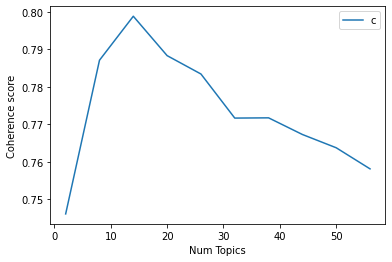

In [34]:
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [35]:

for no_of_topics, cv in zip(range(2, 60, 6), coherence_values):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.7461
Num Topics: 8  - Coherence Value: 0.7871
Num Topics: 14  - Coherence Value: 0.7988
Num Topics: 20  - Coherence Value: 0.7883
Num Topics: 26  - Coherence Value: 0.7834
Num Topics: 32  - Coherence Value: 0.7717
Num Topics: 38  - Coherence Value: 0.7717
Num Topics: 44  - Coherence Value: 0.7673
Num Topics: 50  - Coherence Value: 0.7637
Num Topics: 56  - Coherence Value: 0.7581


In [36]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:804: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


In [37]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"deal" + 0.007*"greek" + 0.007*"debt" + 0.007*"boost" + 0.007*"lng" + '
  '0.007*"supply" + 0.007*"sink" + 0.007*"asian" + 0.007*"volatile" + '
  '0.004*"year"'),
 (1,
  '0.021*"market" + 0.007*"shipment" + 0.007*"spook" + 0.007*"emerge" + '
  '0.007*"reach" + 0.007*"dollar" + 0.007*"oversupply" + 0.007*"recoil" + '
  '0.007*"adv" + 0.007*"announce"'),
 (2,
  '0.007*"bind" + 0.007*"power" + 0.007*"ogra" + 0.007*"present" + '
  '0.007*"responsible" + 0.007*"crisi" + 0.007*"expire" + 0.007*"security" + '
  '0.007*"integral" + 0.007*"situation"'),
 (3,
  '0.007*"raise" + 0.007*"railway" + 0.007*"power" + 0.007*"card" + '
  '0.007*"employee" + 0.007*"pay" + 0.007*"plant" + 0.007*"karachi" + '
  '0.004*"go" + 0.004*"vehicle"'),
 (4,
  '0.035*"stock" + 0.018*"open" + 0.016*"percent" + 0.009*"higher" + '
  '0.009*"lower" + 0.006*"may" + 0.006*"dar" + 0.006*"cost" + '
  '0.006*"operation" + 0.006*"maintain"'),
 (5,
  '0.009*"number" + 0.009*"tax" + 0.007*"take" + 0.007*"petrol" +

In [38]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.040435 -0.002286       1        1  27.287019
13     0.002156  0.014340       2        1  14.671047
4      0.012165 -0.009773       3        1   8.040270
5      0.003982 -0.000172       4        1   6.758192
9      0.003521 -0.000257       5        1   6.558213
8      0.003112 -0.000328       6        1   5.765079
1      0.003898  0.000191       7        1   4.918910
11     0.002855 -0.000181       8        1   4.885632
6      0.001407 -0.000329       9        1   4.352655
2      0.001900 -0.000108      10        1   4.143960
10     0.002131 -0.000217      11        1   4.138695
0      0.001331 -0.000260      12        1   3.042637
3      0.001181 -0.000266      13        1   2.788494
7      0.000797 -0.000354      14        1   2.649197, topic_info=       Term      Freq     Total Category  logprob  loglift
14      oil  8.000000  8.000000  Default  30.0000  30.0000
7     stock  2.000000  2.000000  Default  29.0000  29.0000
26   market  1.000000  1.000000  Default  28.0000  28.0000
10     open  1.000000  1.000000  Default  27.0000  27.0000
11  percent  1.000000  1.000000  Default  26.0000  26.0000
..      ...       ...       ...      ...      ...      ...
25   higher  0.044633  1.670575  Topic14  -5.4471   0.0085
26   market  0.044633  1.851310  Topic14  -5.4471  -0.0943
27  rebound  0.044633  2.154096  Topic14  -5.4471  -0.2457
28      day  0.044633  1.855962  Topic14  -5.4471  -0.0968
29      may  0.044633  1.659813  Topic14  -5.4471   0.0149

[592 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
192       1  0.577730  allocation
53        1  0.564081     approve
0         1  0.555928         cut
28        1  0.538804         day
17        1  0.577730      defend
77        1  0.545750      dollar
21        2  0.438518        drop
23        1  0.670730      extend
20        1  0.389886        fall
104       1  0.577730        gain
193       1  0.515624         gas
24        1  0.577730      growth
18        1  0.515624         hit
39        1  0.564690        hold
147       1  0.577730   inventory
105       1  0.515624         job
56        1  0.577730        keep
57        1  0.577730        king
58        1  0.577730        line
204       1  0.577730        loss
19        1  0.424390         low
214       1  0.577730         mix
59        1  0.538433         new
14        1  0.833089         oil
10        3  0.508421        open
60        1  0.515666      output
61        1  0.504752      policy
15        1  0.647765       price
15        2  0.161941       price
74        2  0.493156           r
27        2  0.464232     rebound
183       1  0.577730      remain
118       1  0.577730      resume
133       1  0.465576        rise
62        1  0.515666       saudi
63        1  0.560085         see
184       1  0.577730        shut
185       1  0.577730       sindh
88        1  0.515627       slide
186       1  0.577730     station
7         3  0.402350       stock
79        1  0.577730        warn
8         1  0.626900        year, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 14, 5, 6, 10, 9, 2, 12, 7, 3, 11, 1, 4, 8])

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [40]:
# Write your code here

from gensim.models import LsiModel
lsamodel = LsiModel(corpus, 20, id2word)



In [41]:
def compute_coherence_values_lsi(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

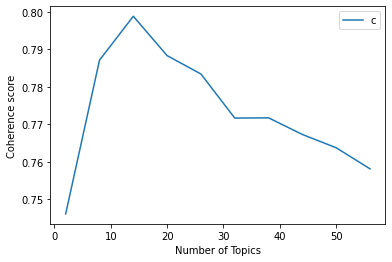

In [42]:
start,stop,step=2,60,6
model_list_lsa, coherence_values_lsa = compute_coherence_values_lsi(id2word, corpus,after_lemmatization,stop, start, step)
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [43]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values_lsa):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.4843
Num Topics: 8  - Coherence Value: 0.5223
Num Topics: 14  - Coherence Value: 0.5115
Num Topics: 20  - Coherence Value: 0.4842
Num Topics: 26  - Coherence Value: 0.4939
Num Topics: 32  - Coherence Value: 0.4961
Num Topics: 38  - Coherence Value: 0.5043
Num Topics: 44  - Coherence Value: 0.4927
Num Topics: 50  - Coherence Value: 0.5148
Num Topics: 56  - Coherence Value: 0.5054


In [44]:
pprint(lsamodel.print_topics())

[(0,
  '0.738*"oil" + 0.576*"price" + 0.172*"extend" + 0.107*"rebound" + '
  '0.107*"drop" + 0.098*"fall" + 0.098*"year" + 0.082*"market" + 0.078*"rise" '
  '+ 0.058*"weak"'),
 (1,
  '0.749*"stock" + 0.436*"open" + 0.341*"percent" + 0.161*"higher" + '
  '0.161*"lower" + 0.136*"year" + 0.082*"market" + 0.059*"day" + 0.056*"asian" '
  '+ 0.053*"regain"'),
 (2,
  '-0.591*"price" + 0.339*"oil" + 0.269*"year" + 0.237*"low" + 0.200*"market" '
  '+ 0.177*"saudi" + 0.177*"output" + 0.170*"policy" + 0.138*"rebound" + '
  '0.121*"dollar"'),
 (3,
  '0.557*"year" + 0.337*"low" + -0.268*"drop" + -0.236*"saudi" + '
  '-0.236*"output" + -0.172*"demand" + -0.166*"record" + 0.153*"dollar" + '
  '0.147*"hit" + 0.140*"interest"'),
 (4,
  '-0.511*"market" + 0.290*"policy" + 0.290*"year" + 0.191*"output" + '
  '0.191*"saudi" + 0.188*"price" + 0.176*"new" + 0.173*"hold" + -0.163*"oil" + '
  '-0.158*"day"'),
 (5,
  '0.471*"drop" + -0.404*"extend" + 0.280*"market" + -0.230*"oil" + '
  '0.227*"price" + 0.197*"

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

Latent Semantic Analysis (LSA):

LSA is used for identifying themes whereas LDA is used for solving topic modelling problems and it focuses on decreasing the matrix dimensions

Latent Dirichlet allocation (LDA):

LDA focuses on solving topic modelling problems

From the results, accuracy of LSA (Latent Semantic Analysis) is lower than the accuracy of LDA(Latent Dirichlet allocation)
As the accuracy for LDA is more, we can easily generate LDA models.

